<a href="https://colab.research.google.com/github/mohamedelziat50/Hotel-Bookings-AI-MIU/blob/main/Hotel_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI Project - Machine Learning Pipeline on an Hotel Bookings Dataset

## Import The Neccesary Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE

## Read The Dataset
Upload through files in colab.

Note: The target variable for prediction is `is_canceled`.

In [ ]:
df = pd.read_csv('/content/hotel_bookings.csv')

## Display a portion of the data
Check data info (column datatypes and number of non null values)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Display first 5 rows using pandas

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,city
0,Resort Hotel - Chandigarh,0,342,2024,July,30,27,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,16:40.9,Chandigarh
1,Resort Hotel - Mumbai,0,737,2024,April,17,28,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,56:21.5,Mumbai
2,Resort Hotel - Delhi,0,7,2024,September,37,10,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,46:25.7,Delhi
3,Resort Hotel - Kolkata,0,13,2024,August,33,14,0,1,1,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,07:10.1,Kolkata
4,Resort Hotel - Lucknow,0,14,2024,September,37,14,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,27:32.5,Lucknow


Display last 5 rows using pandas

In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,city
119385,City Hotel - Pune,0,23,2024,September,39,29,2,5,2,...,394.0,NaN,0,Transient,96.14,0,0,Check-Out,33:06.0,Pune
119386,City Hotel - Mumbai,0,102,2024,November,46,16,2,5,3,...,9.0,NaN,0,Transient,225.43,0,2,Check-Out,55:18.4,Mumbai
119387,City Hotel - Lucknow,0,34,2024,April,16,19,2,5,2,...,9.0,NaN,0,Transient,157.71,0,4,Check-Out,50:23.0,Lucknow
119388,City Hotel - Ahmedabad,0,109,2024,October,40,5,2,5,2,...,89.0,NaN,0,Transient,104.40,0,0,Check-Out,37:40.4,Ahmedabad
119389,City Hotel - Bhopal,0,205,2024,December,51,21,2,7,2,...,9.0,NaN,0,Transient,151.20,0,2,Check-Out,11:08.1,Bhopal


## Data Preprocessing & Cleaning
Anaylze the dataset's shape:
- 119390 rows (records)
- 33 columns (features) - including target feature

In [ ]:
print("Dataset's shape:", df.shape)

Dataset's shape: (119390, 33)


### 1. Detect Missing Values
Display a table representing nulls (feature -> corresponding records with nulls)

- .isnull(): Returns a boolean mask of True & False values
- .sum(): Counts the True values in each column/feature

In [ ]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


Table shows the features with nulls are:
-   children (4)
-   country (488)
-   agent (16340)
-   company (112593)

To determine whether or not we drop a column/feature:
- Divide the number of nulls over total number of records, to get the percentage
- Set a threshold (50%) for null values (if above handle nulls)

In [ ]:
(df.isnull().sum() / df.shape[0]) * 100

,0
hotel,0.000000
is_canceled,0.000000
lead_time,0.000000
arrival_date_year,0.000000
arrival_date_month,0.000000
arrival_date_week_number,0.000000
arrival_date_day_of_month,0.000000
stays_in_weekend_nights,0.000000
stays_in_week_nights,0.000000
adults,0.000000


Because `company` has threshold more than 50% (94.3), we should delete (drop) whole column

axis=1: Operation should be performed on the columns (vertical axis). The default value for axis is 0 (rows - horizontal axis).


**Note**: the other columns still need to be handled through an **imputer** later.

In [ ]:
df = df.drop('company', axis=1)

### 2. Handle Unique & Identical Value Columns
Count the number of unique values in each column to check whether:
- The values are all unique (no pattern to be found in the data)
- The values are all the same (not useful - identical)

nunique(): counts the number of unique non-null values

In [ ]:
print(f"Note: the dataset has {df.shape[0]} rows.")
unique_counts = df.nunique()
unique_counts

Note: the dataset has 119390 rows.


,0
hotel,30
is_canceled,2
lead_time,479
arrival_date_year,1
arrival_date_month,12
arrival_date_week_number,52
arrival_date_day_of_month,31
stays_in_weekend_nights,17
stays_in_week_nights,35
adults,14


Because the `arrival_date_year` column has only 1 unique value, no pattern can be detected from it, **so we will drop it as its not necessary.**

In [ ]:
df = df.drop('arrival_date_year', axis=1)

### 3. Handle Duplicate Values
.duplicated(): used to find duplicate rows

np.int64(0) indicates that no duplicate values exist, so no duplicates to be removed

In [ ]:
print("Duplicated Columns:", df.duplicated().sum())

Duplicated Columns: 0


### 4. Handle Garbage Values
Garbage values: incorrect, unexpected data

Identified by simply eyeballing the value & noticing if anything is out of place or unexpected.

In [ ]:
# Identifying garbage values in `string` objects
for feature in df.select_dtypes(include = "object").columns:
    print("=" * 10, "Feature:", feature, "=" * 10)
    print(df[feature].value_counts()) # Displays a value and it's count
    print() # New Line

========== Feature: hotel ==========
hotel
City Hotel - Ahmedabad       5405
City Hotel - Bhopal          5367
City Hotel - Jaipur          5343
City Hotel - Pune            5343
City Hotel - Kolkata         5339
City Hotel - Hyderabad       5339
City Hotel - Goa             5297
City Hotel - Chandigarh      5293
City Hotel - Lucknow         5290
City Hotel - Mumbai          5265
City Hotel - Delhi           5252
City Hotel - Chennai         5251
City Hotel - Bangalore       5210
City Hotel - Indore          5170
City Hotel - Kochi           5166
Resort Hotel - Bhopal        2737
Resort Hotel - Delhi         2726
Resort Hotel - Kochi         2723
Resort Hotel - Jaipur        2695
Resort Hotel - Bangalore     2687
Resort Hotel - Chandigarh    2685
Resort Hotel - Goa           2676
Resort Hotel - Chennai       2674
Resort Hotel - Mumbai        2670
Resort Hotel - Indore        2657
Resort Hotel - Pune          2649
Resort Hotel - Hyderabad     2642
Resort Hotel - Kolkata       2637
Resor

Fields containing garbage values:
- `meal` has 1169 'Undefinded'
- `market_segment` has 2 'Undefined'
- `distribution_channel` has 5 'Undefined'

**So we have to replace it with null.** (Then **impute** later)

In [ ]:
# Replace 'undefined' with NaN in specific columns: 'market_segment' and 'distribution_channel'
df['meal'] = df['meal'].replace('Undefined', np.nan)
df['market_segment'] = df['market_segment'].replace('Undefined', np.nan)
df['distribution_channel'] = df['distribution_channel'].replace('Undefined', np.nan)

# Check whether they were removed.
print(df["market_segment"].value_counts())
print()
print(df["distribution_channel"].value_counts())

market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Name: count, dtype: int64

distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Name: count, dtype: int64


### 5. Detect Outliers
.describe(): Descriptive statistics to understand more about the data

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,26.375835,15.723394,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,15.021596,8.805079,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,13.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,26.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,39.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,52.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


We identified the columns that have outliers through:
- Difference between `75%` and `max` is SIGNIFICANT (Higher Outliers)
- Difference between `50%` (median) and `mean` is SIGNIFICANT
- Difference between `25%` and `min` is SIGNIFICANT (**NOT IMPLEMENTED YET**, DOUBLE CHECK FIRST - Lower Outliers)

Features with outliers:
*   Lead_time
*   stays_in_weekend_nights
*   stays_in_week_nights
*   adults
*   children
*   babies
*   previous_cancellations
*   previous_bookings_not_canceled
*   booking_changes
*   days_in_waiting_list
*   agent (ID - categories)
*   adr (-ve value minimum - that's wrong)

Descripitive statistics for `string` values aswell

In [ ]:
df.describe(include = "object")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,city
count,119390,119390,119390,118902,119388,119385,119390,119390,119390,119390,119390,119390,119390
unique,30,12,5,177,7,4,10,12,3,4,3,34552,15
top,City Hotel - Ahmedabad,October,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,10:59.8,Bhopal
freq,5405,10349,92310,48590,56477,97870,85994,74053,104641,89613,75166,14,8104


#### Visualization Function
Created a visualization function to avoid repeated code, just specify type of diagram needed to be displayed.

Assumes 18 Features, So keep that in mind! (not generic)

Matplotlib Syntax:
- plt.subplot(2, 3, i)  # 2 rows, 3 columns, current index

In [ ]:
def visualize_diagram(diagram_name):
    # Intialize rows and columns (6 rows with 3 plots per row)
    rows = 6
    columns = 3

    # Create the big plot with specific dimensions
    plt.figure(figsize=(5 * columns, 4 * rows))

    # Iterate over the features & create the histograms
    for i, col in enumerate(numeric_columns):
        plt.subplot(rows, columns, i + 1) # +1 because Matplotlib starts from index 1 in the plots
        if diagram_name == "Histogram":
            sns.histplot(data=df, x=col)
        elif diagram_name == "Boxplot":
            sns.boxplot(data=df, x=col)

    plt.tight_layout()
    plt.show()

#### Histogram Visualization
Histogram to understand data distribution (numeric columns)

In [ ]:
# Select numeric columns - returns a list (not dateframe)
numeric_columns = df.select_dtypes(include="number").columns

# Store the numeric columns length (18 features)
numeric_columns_length = len(numeric_columns)

print("Number of numeric columns/features:", numeric_columns_length)

Number of numeric columns/features: 18


Some distributions appear to be 'skewed' because of outliers.

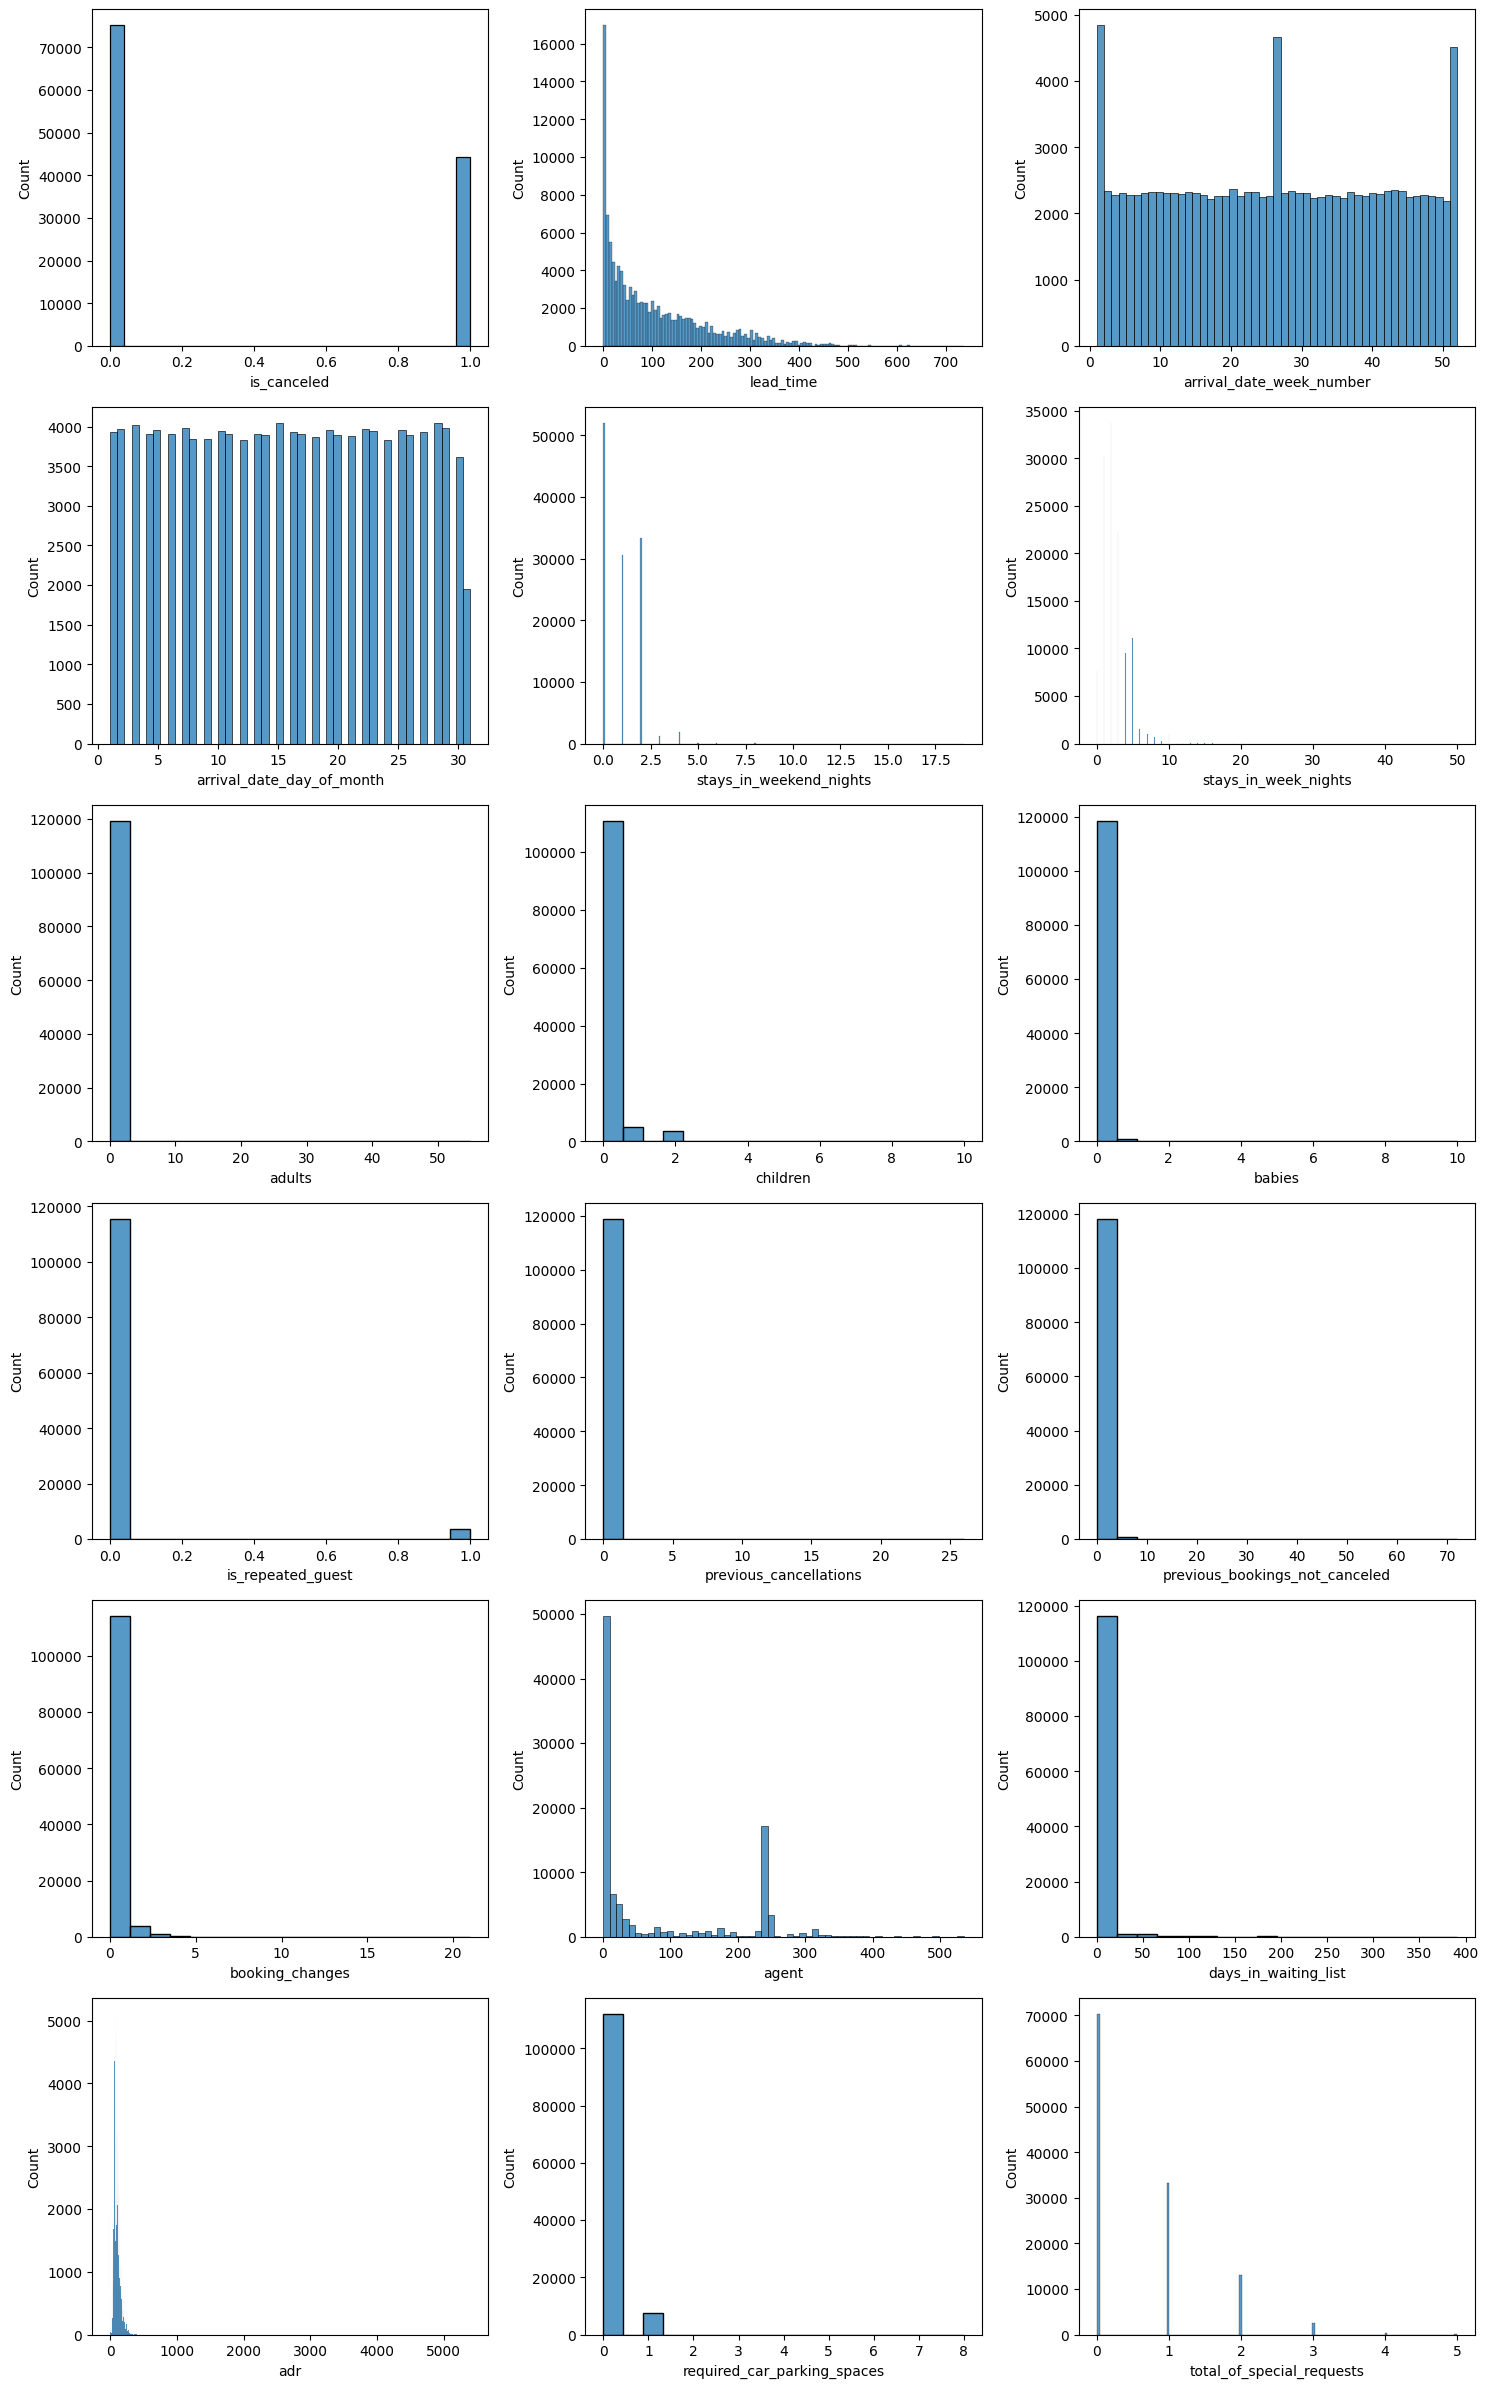

In [ ]:
visualize_diagram("Histogram")

#### Boxplot Visualization
To identify outliers visually through the whiskers

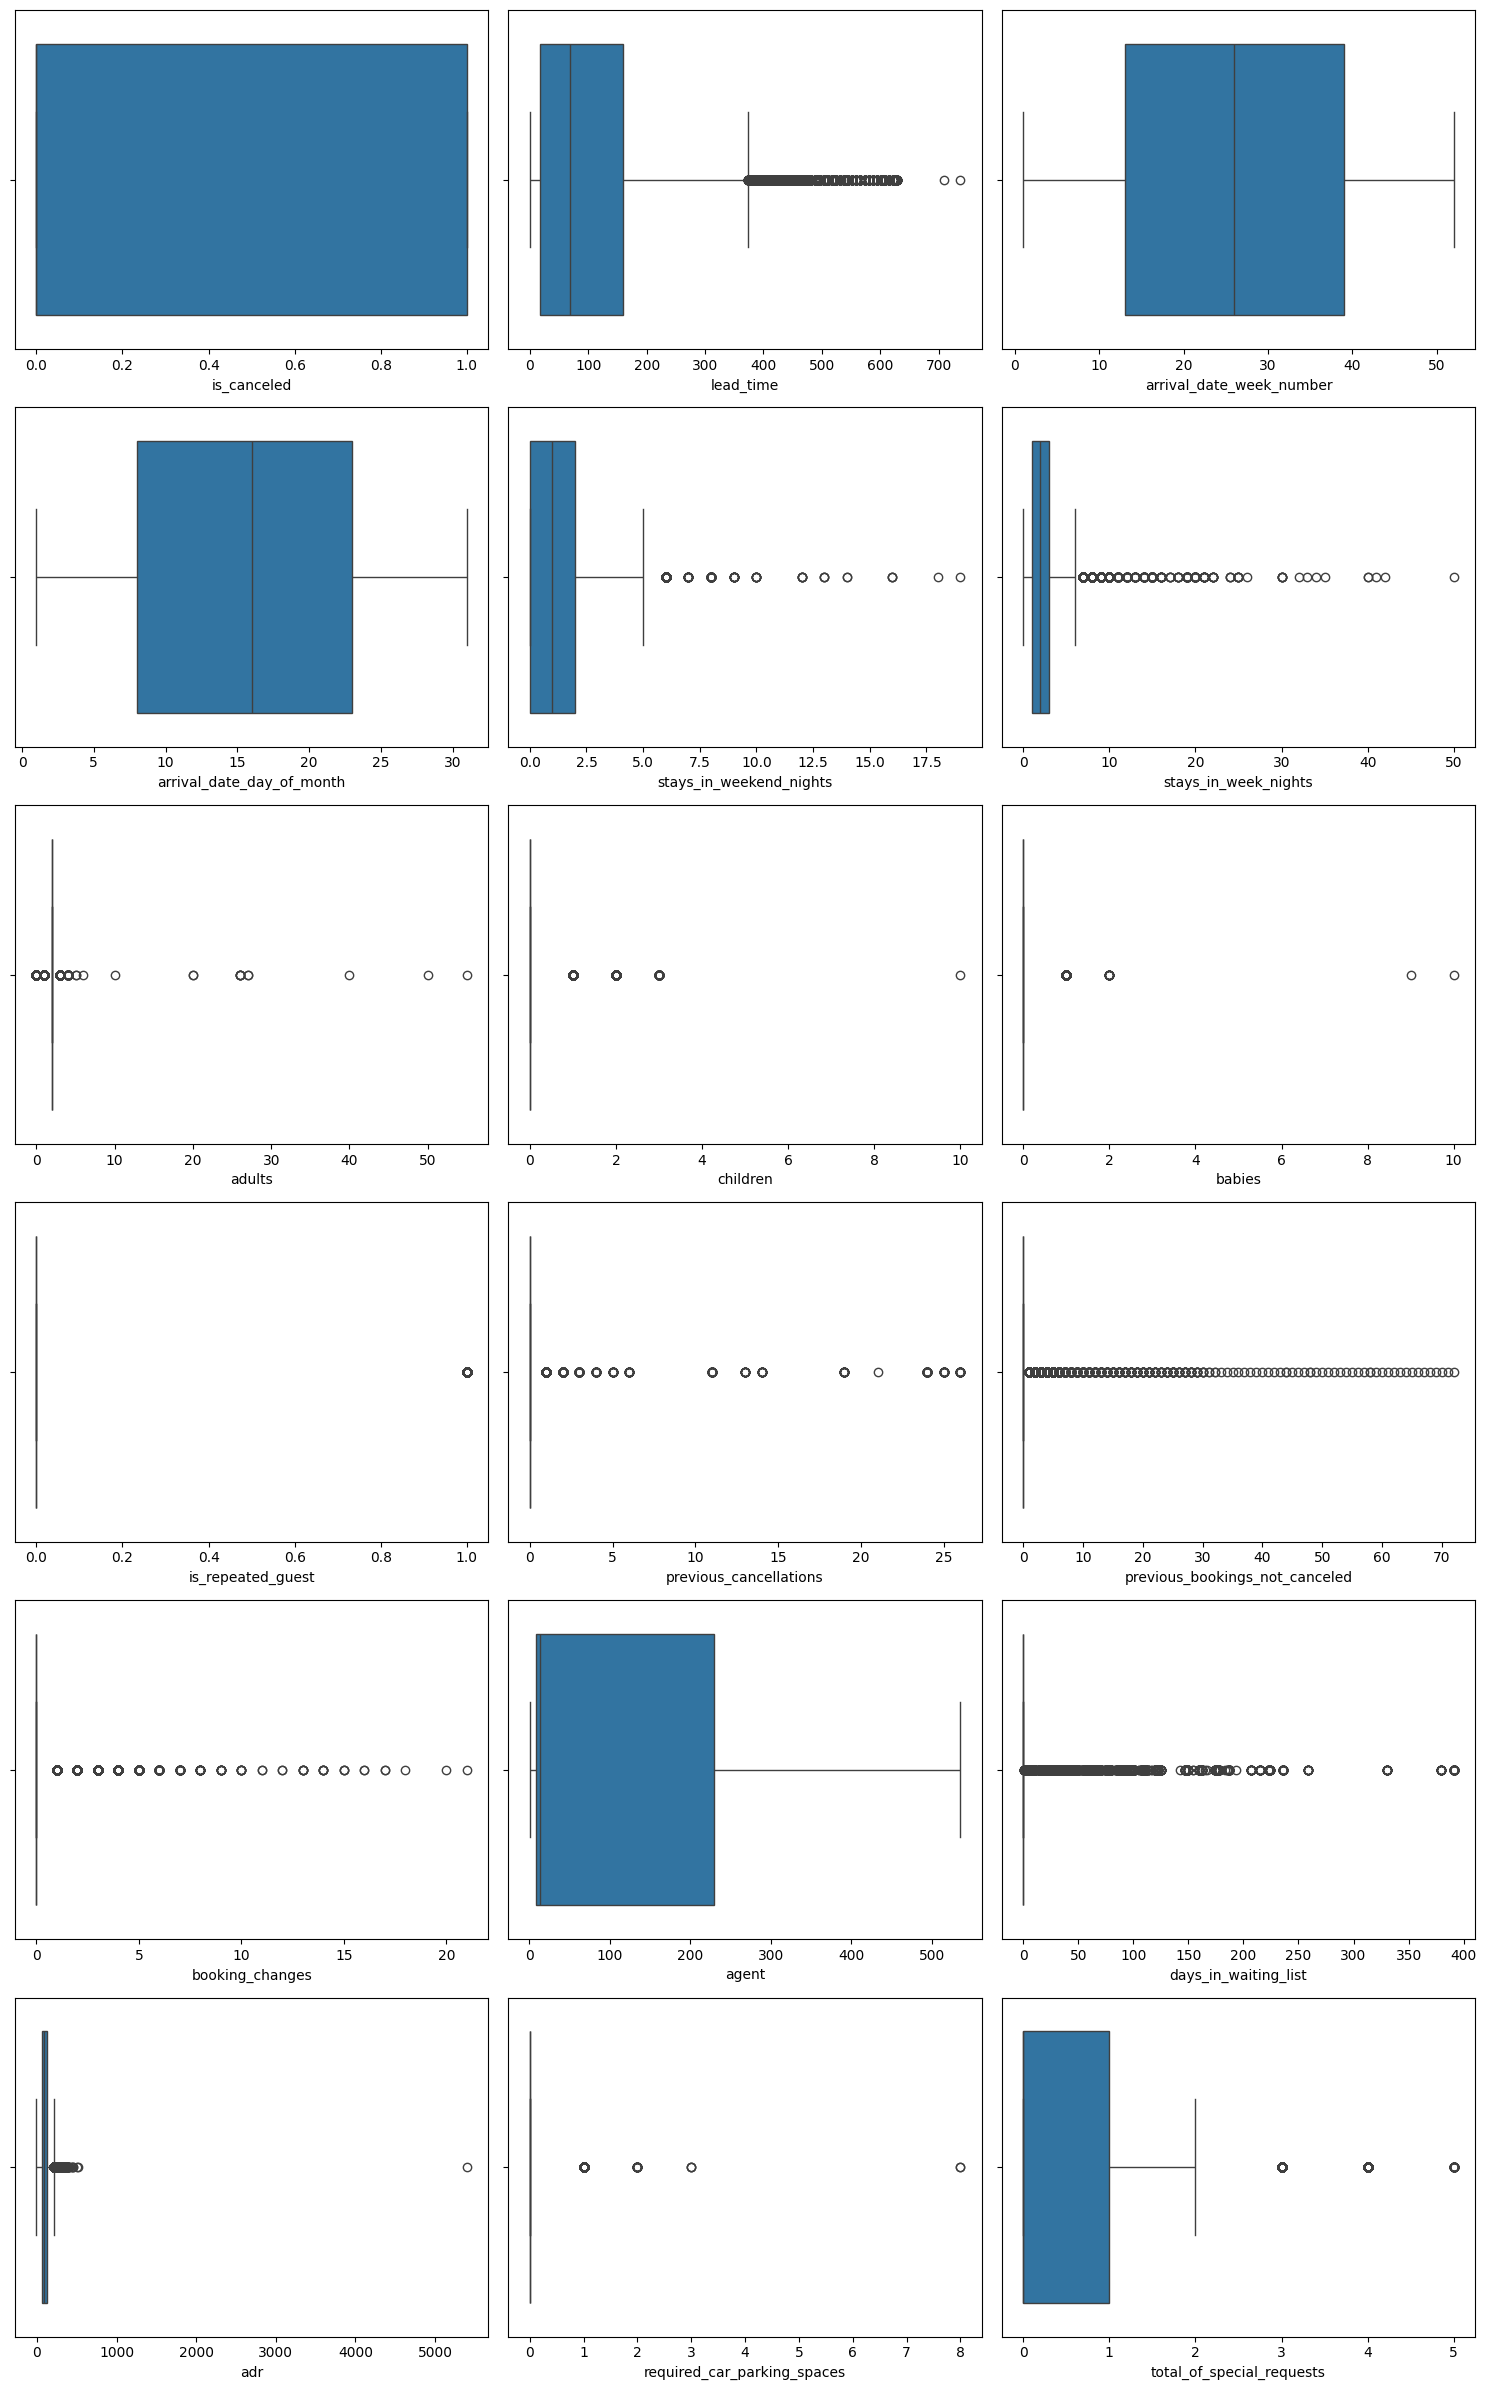

In [ ]:
visualize_diagram("Boxplot")

### 6. Fix Impossible Values (After understanding)
adr: Average Daily Rate (price per room per day)

Why **negative** price is **WRONG**: Hotels cannot charge negative prices (so it's probably a data entry error)

Set minimum to be zero.

In [ ]:
df['adr'] = df['adr'].clip(lower=0)  # Negative price is WRONG

### 7. Impute (Handle Missing Values)

Note: target is never imputed, as it will lead to misleading results. Thus, we immediatly drop any null values.

Detected Missing Value Columns:
- children (4) - Numerical
- country (488) - Text
- agent (16340) - Numerical

Imputing the numeric values with the median

In [ ]:
for col in ['children','agent']:
  if col in df.columns:
    df[col] = df[col].fillna(df[col].median())

Imputing the `string` objects' with the mode

`market_segment`,`distribution_channel` had garbage values that were replaced with NaN, so we impute them aswell.

In [ ]:
for col in ['country','market_segment','distribution_channel']:
    if df[col].isnull().any(): # Check if the column has any null values
        df[col] = df[col].fillna(df[col].mode()[0])

Check whether there are any missing values (last time)

In [ ]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0
children,0


### 8. Fix incorrect data types
Can't have 2.5 children, Can't have 3.3 adults!

In [ ]:
# Convert to proper data types
df['children'] = df['children'].astype(int)
df['babies'] = df['babies'].astype(int)
df['adults'] = df['adults'].astype(int)

# For 'agent' - it's categorical ID, not numeric value
df['agent'] = df['agent'].astype(str)  # Treat as category

### 9. Handle Outliers
Outliers wasn't handled earlier, as it doesn't affect the imputation methods of median & mode!

Outlier method used: **Interquartile Range (IQR)** - for `numerical` columns

`Clipping`: replace outliers (anything outside the range) with the nearest acceptable value


In [ ]:
# IQR Function that returns a 'clipped' column
def outliers_iqr(df, column):
    # Get the required percentiles
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Difference Between Both Percentiles!
    IQR = Q3 - Q1

    # 2 Thresholds, anything outside of this range is considered an outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # `Clipping`: replace outliers (anything outside the range) with the nearest acceptable value
    return df[column].clip(lower_bound, upper_bound)


Apply IQR function to the numerical columns stated in `Detect Outliers` section

In [ ]:
columns_for_iqr = [
    'lead_time',                # Numerical (days)
    'stays_in_weekend_nights',  # Numerical (count)
    'stays_in_week_nights',     # Numerical (count)
    'adults',                   # Numerical (count)
    'children',                 # Numerical (count)
    'babies',                   # Numerical (count)
    'previous_cancellations',   # Numerical (count)
    'previous_bookings_not_canceled',  # Numerical (count)
    'booking_changes',          # Numerical (count)
    'days_in_waiting_list',     # Numerical (days)
    'adr'                       # Numerical (price)
]

for col in columns_for_iqr:
    df[col] = outliers_iqr(df, col)

### Final Visualization
Are we correct?

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.00000,119390.0,119390.0,119390.0,119390.000000,119390.0,119390.0,119390.0,119390.0,119390.000000,119390.000000,119390.000000
mean,0.370416,102.229157,26.375835,15.723394,0.922682,2.40562,2.0,0.0,0.0,0.031912,0.0,0.0,0.0,0.0,100.659358,0.062518,0.571363
std,0.482918,101.158934,15.021596,8.805079,0.967814,1.52896,0.0,0.0,0.0,0.175767,0.0,0.0,0.0,0.0,44.688822,0.245291,0.792798
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000,2.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,0.000000,18.000000,13.000000,8.000000,0.000000,1.00000,2.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,69.290000,0.000000,0.000000
50%,0.000000,69.000000,26.000000,16.000000,1.000000,2.00000,2.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,94.575000,0.000000,0.000000
75%,1.000000,160.000000,39.000000,23.000000,2.000000,3.00000,2.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,126.000000,0.000000,1.000000
max,1.000000,373.000000,52.000000,31.000000,5.000000,6.00000,2.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,211.065000,8.000000,5.000000


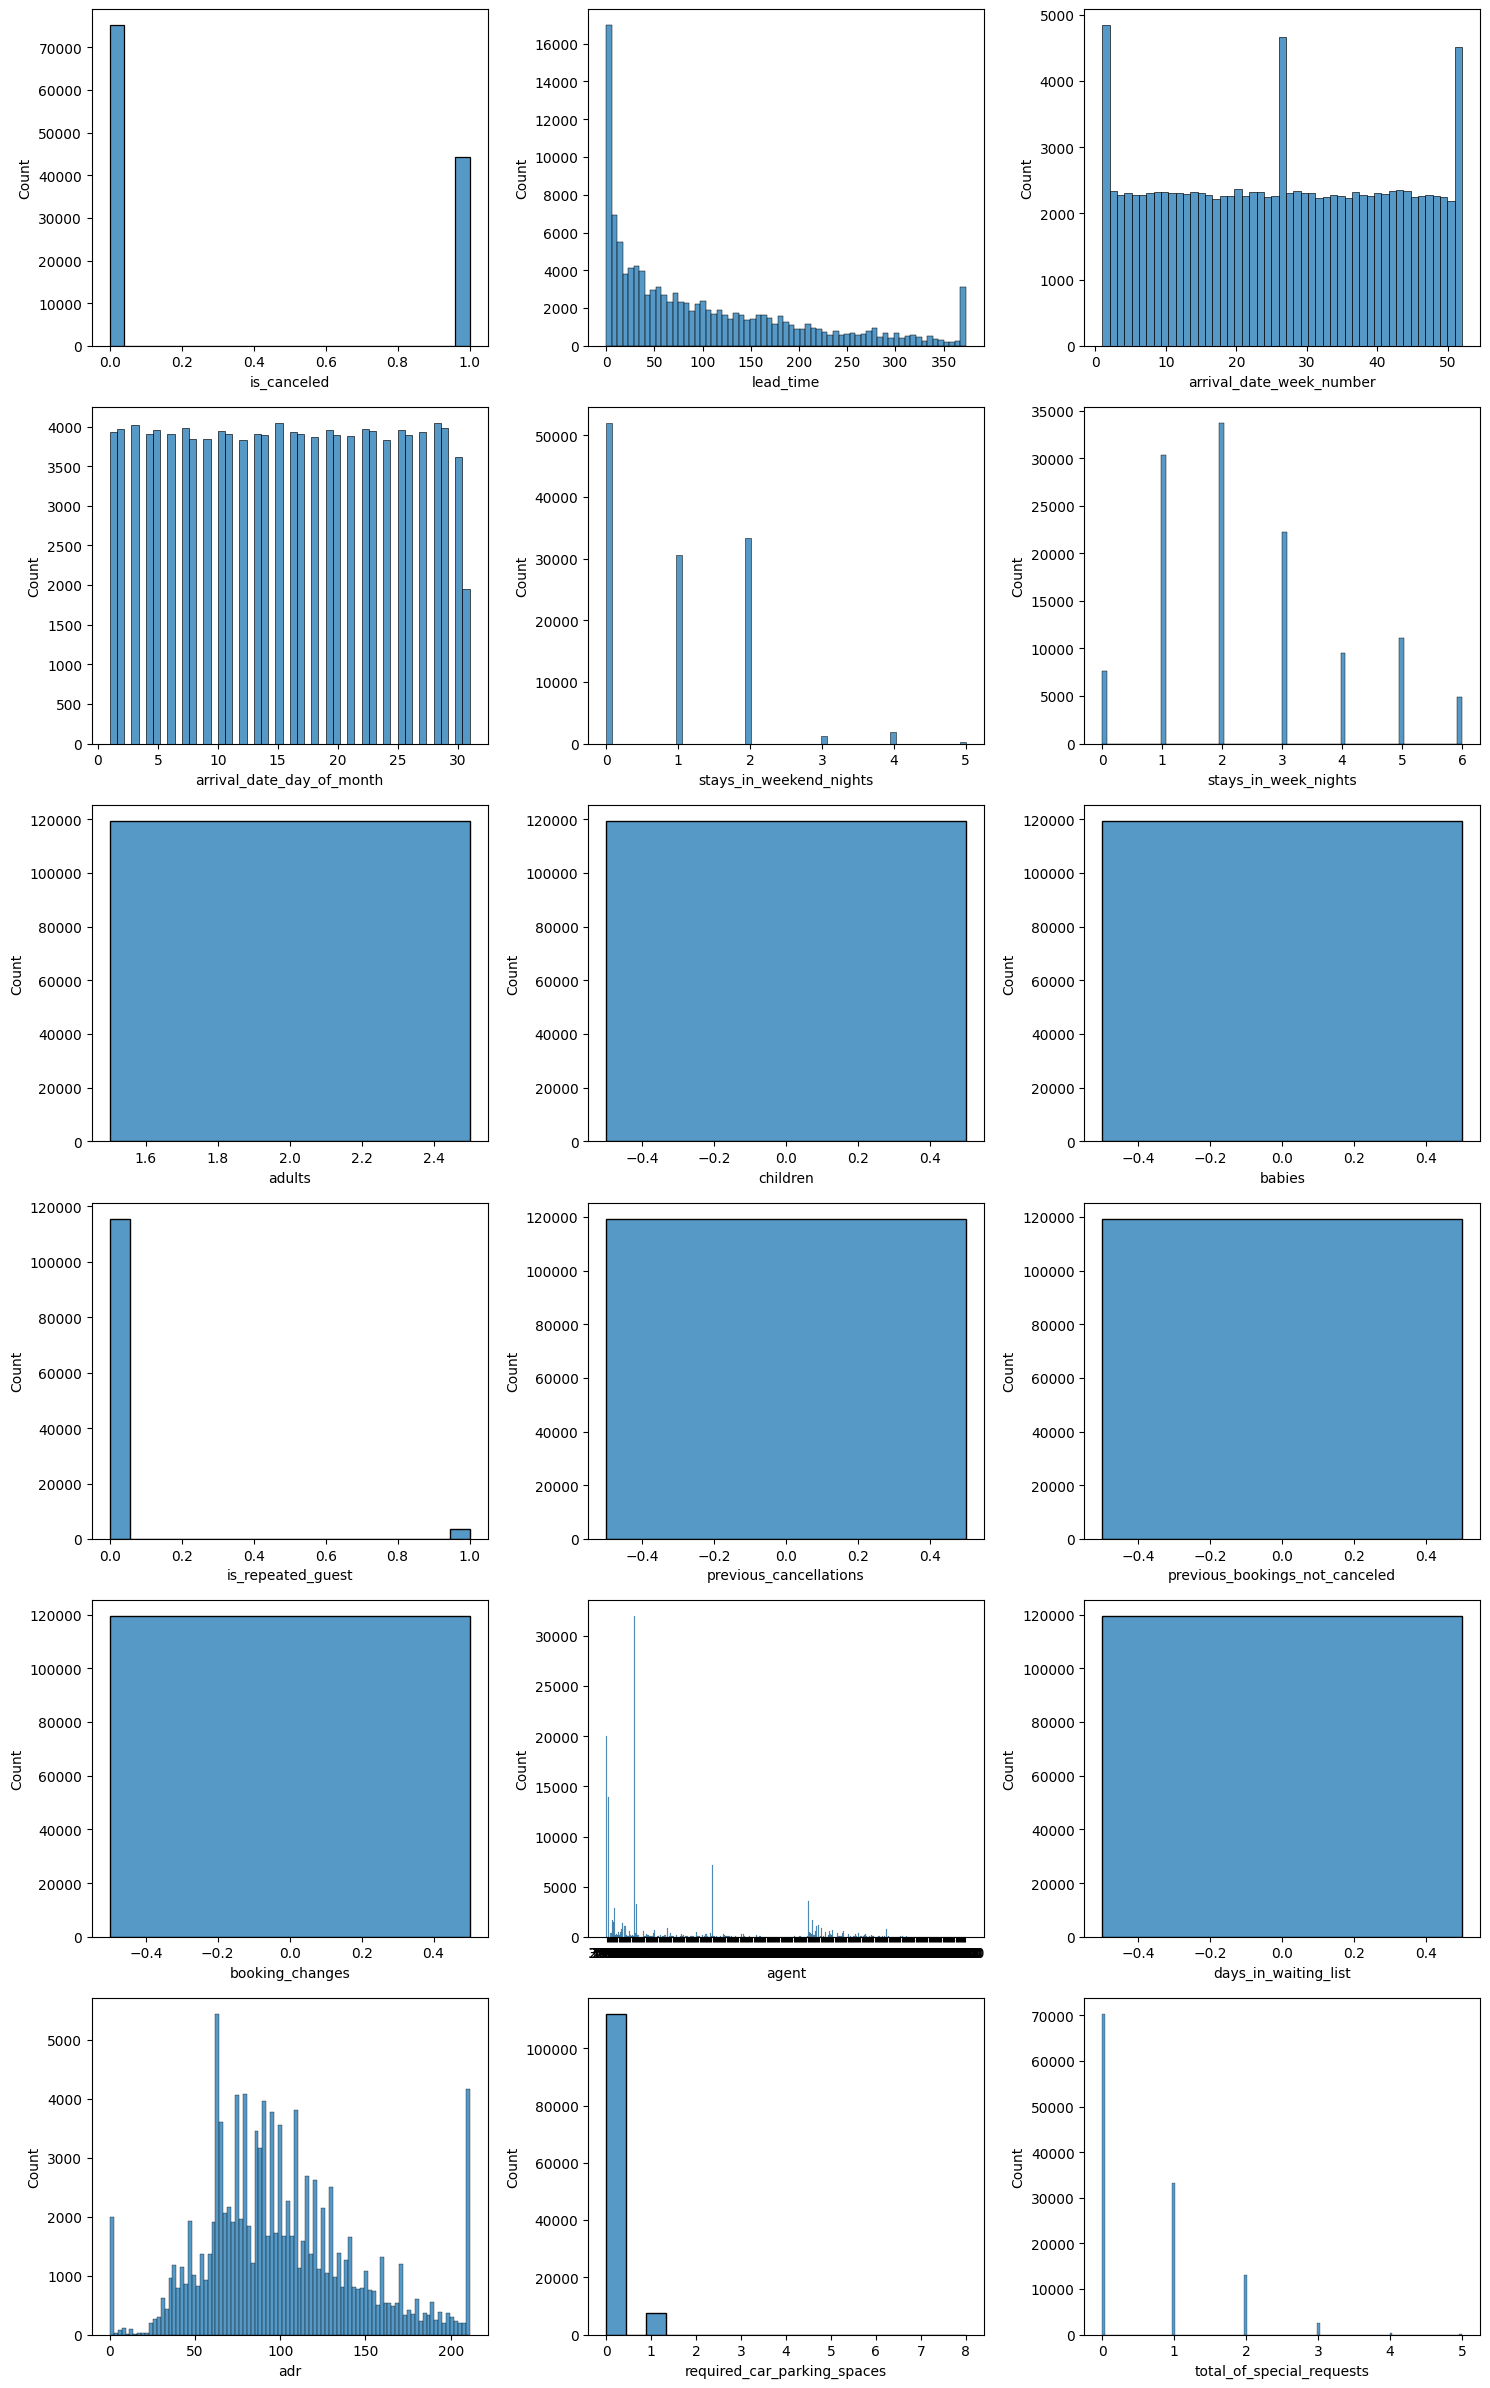

In [ ]:
visualize_diagram("Histogram")

Revise these with me please guys:
- `agent` is an ID so it's boxplot may appear weird. (I believe so)

- Idk abt the last 2 features tbh: `required_car..` & `total_of_speci..` (idk if they're considered outliers in the 1st place, we didnt handle them)

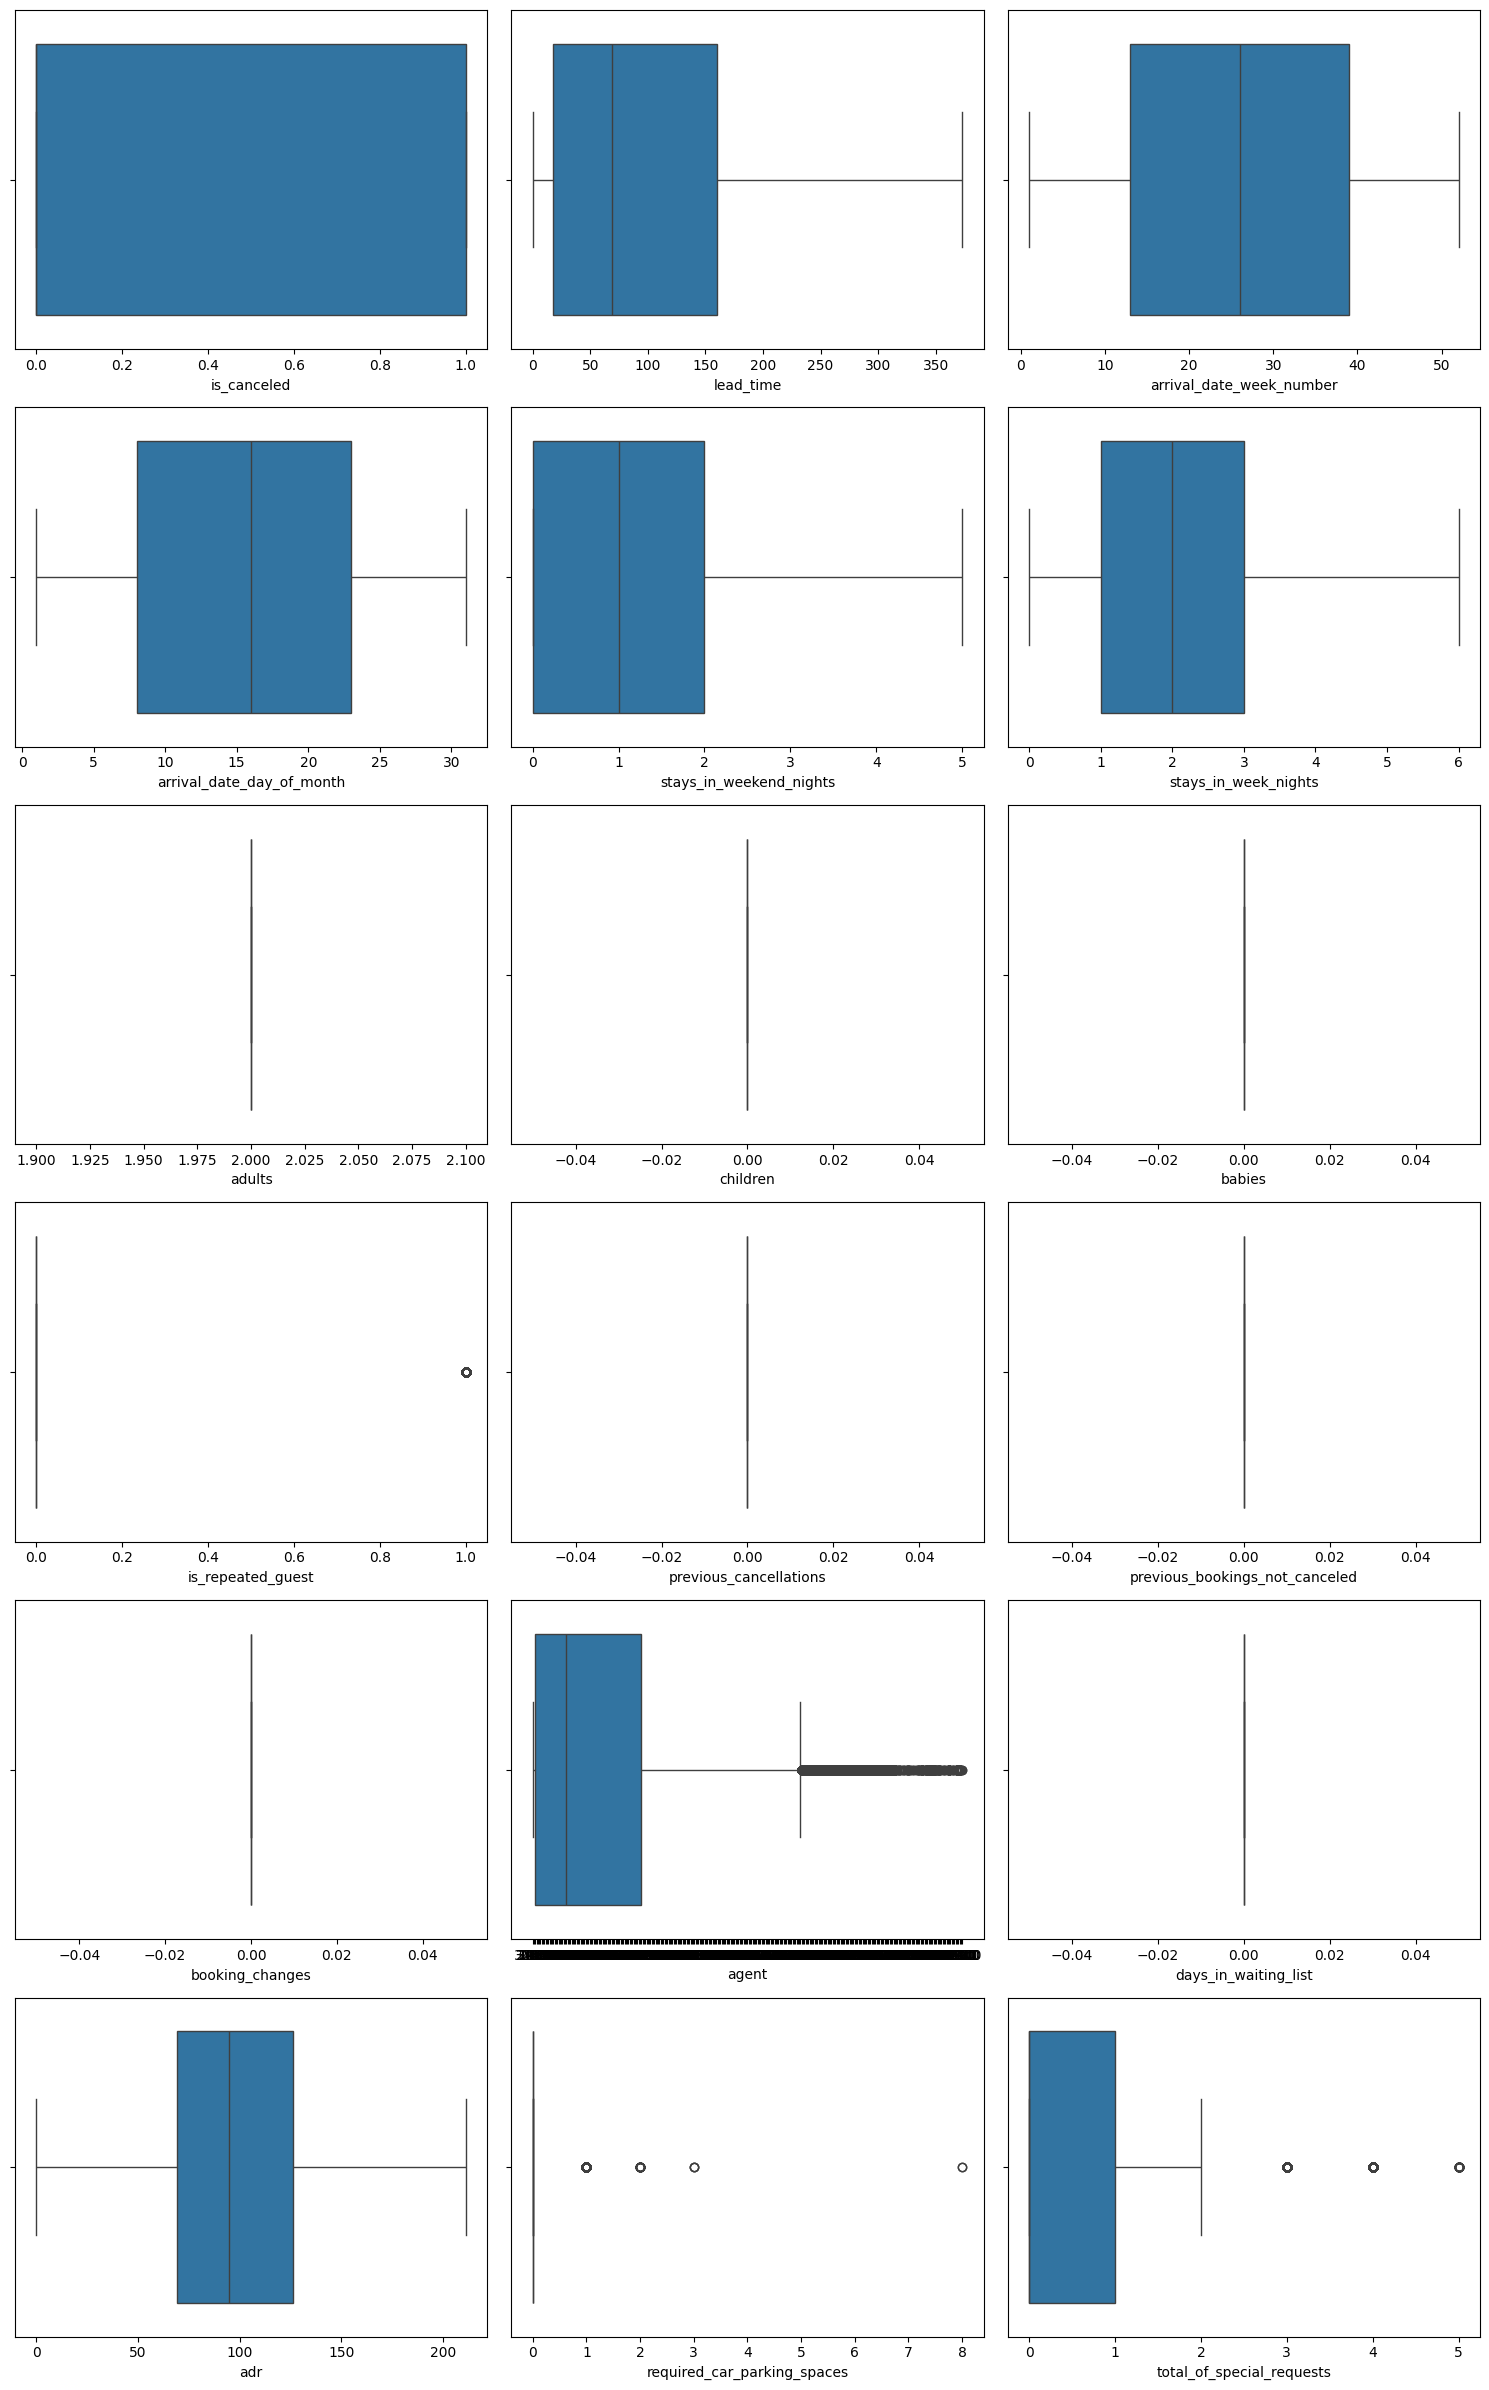

In [ ]:
visualize_diagram("Boxplot")

# Exploratory Data Analysis (EDA)

Distribution of Cancellations

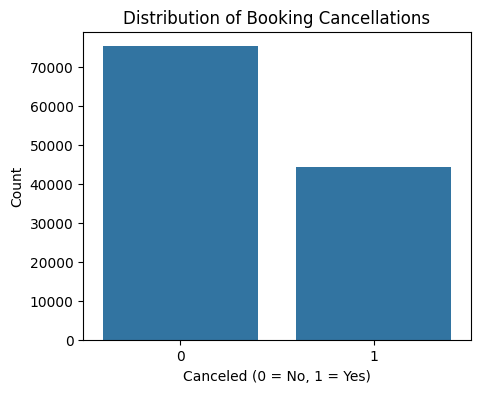

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x='is_canceled', data=df)
plt.title('Distribution of Booking Cancellations')
plt.xlabel('Canceled (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()
#Higher Number of cancellations

Booking Trends by Month

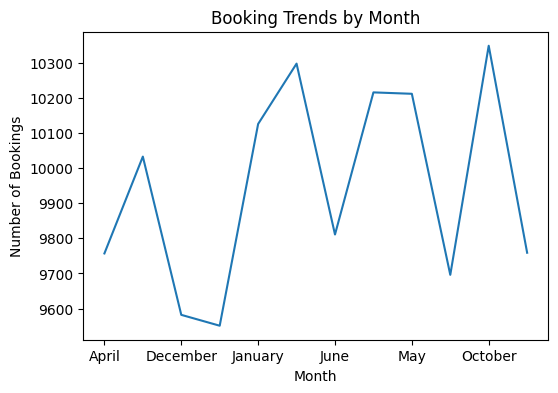

In [ ]:
monthly_bookings = df.groupby('arrival_date_month').size()

plt.figure(figsize=(6,4))
monthly_bookings.plot()
plt.title('Booking Trends by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.show()
#Peakest Month = October
#Lowest Month = December

Booking Trends by Week

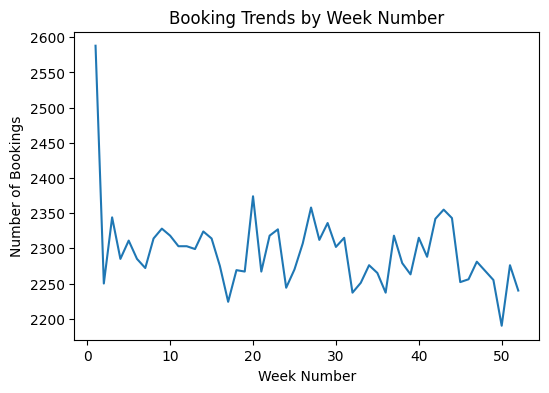

In [ ]:
weekly_bookings = df.groupby('arrival_date_week_number').size()

plt.figure(figsize=(6,4))
weekly_bookings.plot()
plt.title('Booking Trends by Week Number')
plt.xlabel('Week Number')
plt.ylabel('Number of Bookings')
plt.show()


Booking Trends by City

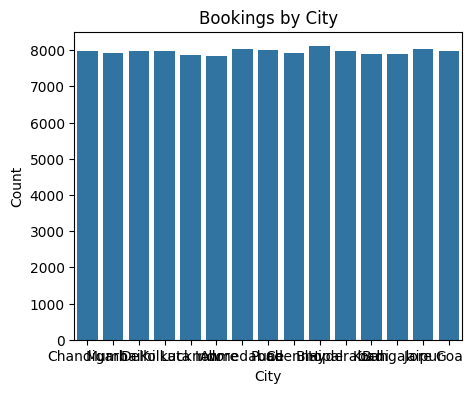

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x='city', data=df)
plt.title('Bookings by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

ADR vs Cancellations

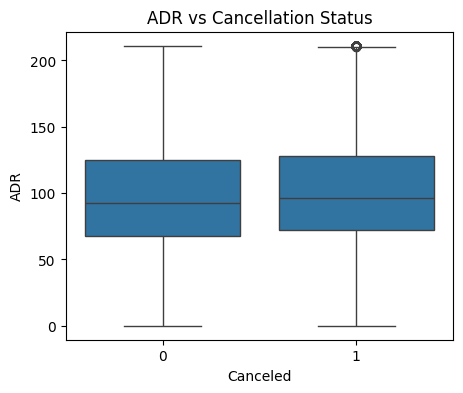

In [ ]:
plt.figure(figsize=(5,4))
sns.boxplot(x='is_canceled', y='adr', data=df)
plt.title('ADR vs Cancellation Status')
plt.xlabel('Canceled')
plt.ylabel('ADR')
plt.show()
#Average daily rate is not a major factor for cancellations.
#The outliers indicate that a few expensive bookings were canceled

Correlation Heatmap

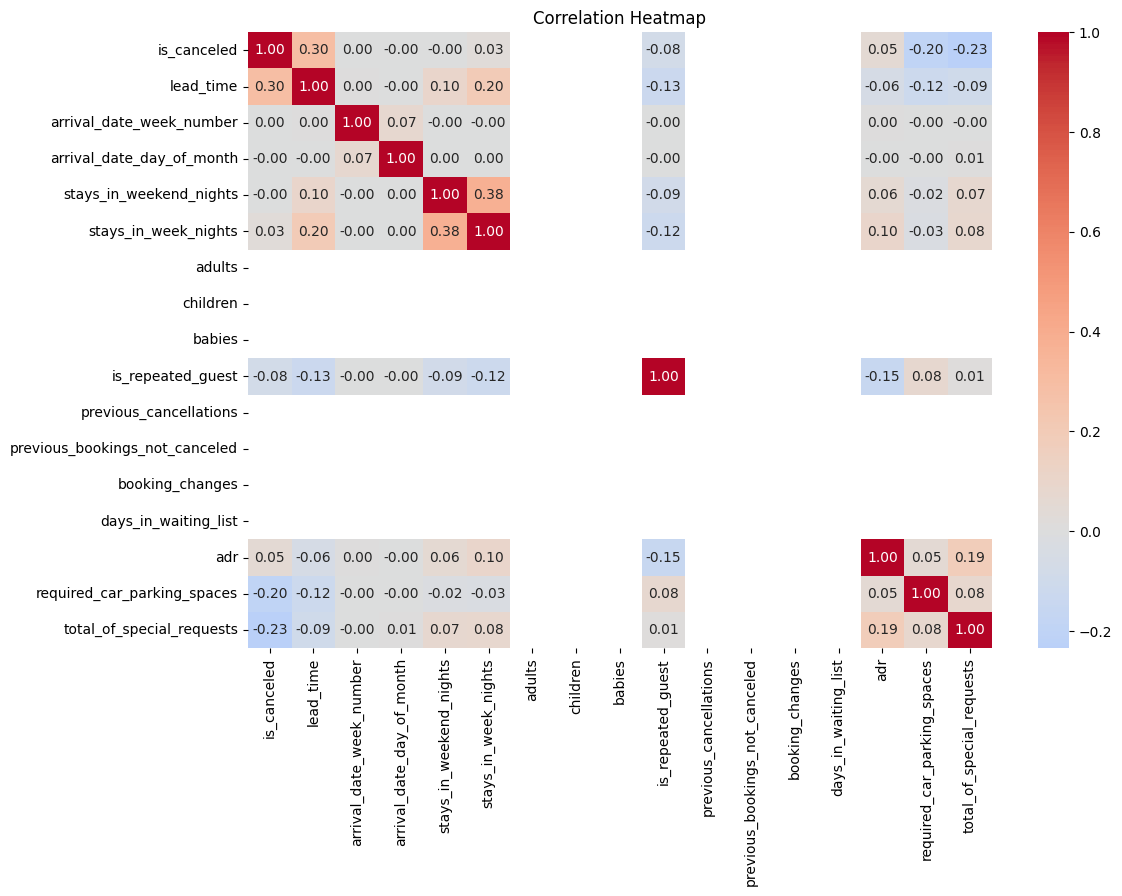

In [ ]:
# Get numeric columns as a dataframe
numeric_df = df.select_dtypes(include='number')

# Create correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Lead Time Analysis

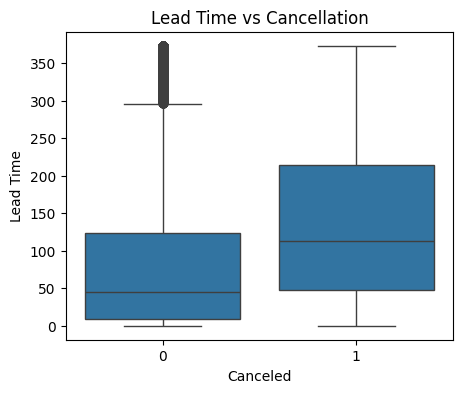

In [ ]:
plt.figure(figsize=(5,4))
sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.title('Lead Time vs Cancellation')
plt.xlabel('Canceled')
plt.ylabel('Lead Time')
plt.show()
#Outliers → extremely early bookings that may cancel.
#people who book far in advance are more likely to cancel.

Categorical Analysis – Hotel Type

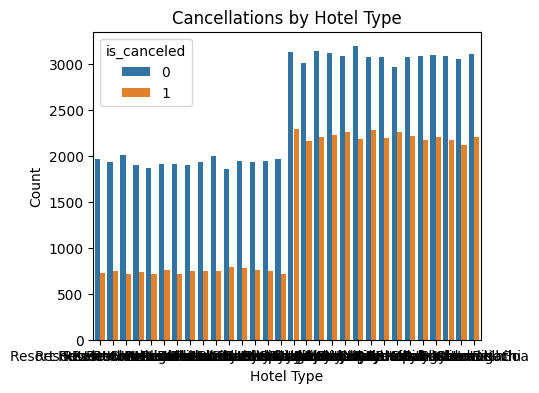

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x='hotel', hue='is_canceled', data=df)
plt.title('Cancellations by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.show()

Categorical Analysis – Customer Type

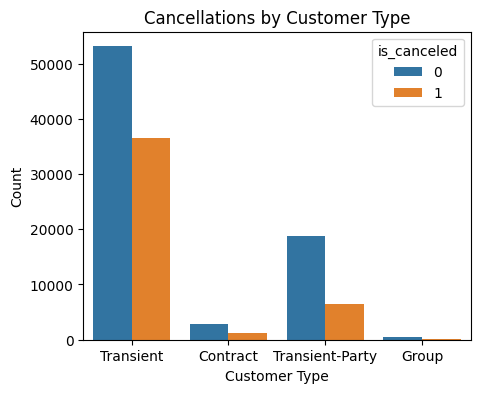

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x='customer_type', hue='is_canceled', data=df)
plt.title('Cancellations by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()


Categorical Analysis – Market Segment

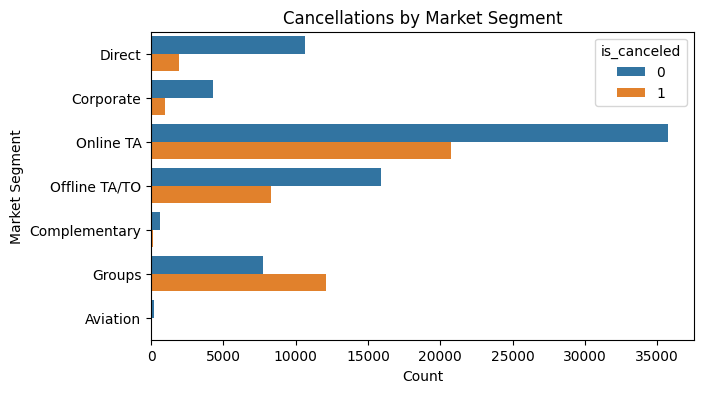

In [ ]:
plt.figure(figsize=(7,4))
sns.countplot(y='market_segment', hue='is_canceled', data=df)
plt.title('Cancellations by Market Segment')
plt.xlabel('Count')
plt.ylabel('Market Segment')
plt.show()

# Convert categorical values to numerical

**Convert dates to usable features**

this line is important

**df.drop('arrival_date_month', axis=1, inplace=True)**

because we already converted the month names into numbers with this line:

**df['arrival_date_month_num'] = df['arrival_date_month'].map(month_mapping)**

Before dropping: You have the month in words

After mapping: The number version is enough for analysis or modeling because most algorithms don’t understand text like January. They only work with numbers

Dropping the original month name cleans the dataset, avoids duplicate information,

In [ ]:
month_mapping = {
'January': 1, 'February': 2, 'March': 3, 'April': 4,
'May': 5, 'June': 6, 'July': 7, 'August': 8,
'September': 9, 'October': 10, 'November': 11, 'December': 12
}


df['arrival_date_month_num'] = df['arrival_date_month'].map(month_mapping)


df['is_peak_season'] = df['arrival_date_month_num'].isin([6, 7, 8]).astype(int)
df['is_month_start'] = (df['arrival_date_day_of_month'] <= 10).astype(int)
df['is_month_end'] = (df['arrival_date_day_of_month'] >= 25).astype(int)


# Drop original month name
df.drop('arrival_date_month', axis=1, inplace=True)

.
 **label encoding**

 Use Label Encoding for columns with few categories or where tree-based models are used.

fit:  learns all unique categories

transform:  converts each category into an integer

**example**

Resort Hotel → 0
City Hotel   → 1

**One-Hot Encoding**

Use One-Hot Encoding for columns with many categories or where no order exists, especially for linear models.

label encoding&*One-Hot Encoding  is used for Convert categorical values to numerical

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Columns for Label Encoding
label_encode_cols = [
    'hotel', 'meal', 'deposit_type', 'customer_type',
    'reserved_room_type', 'assigned_room_type',
    'reservation_status'
]

le = LabelEncoder()
for col in label_encode_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

one_hot_cols = ['country', 'market_segment', 'distribution_channel', 'agent', 'city']
one_hot_cols_existing = [col for col in one_hot_cols if col in df.columns]

df = pd.get_dummies(df, columns=one_hot_cols_existing, drop_first=True)

if 'reservation_status_date' in df.columns:
    def time_to_seconds(time_str):
        try:
            mins, rest = time_str.split(':')
            secs = float(rest)
            return int(mins) * 60 + secs
        except:
            return 0

    df['reservation_status_time_sec'] = df['reservation_status_date'].apply(time_to_seconds)
    df.drop('reservation_status_date', axis=1, inplace=True)


# standradlization

In [ ]:
#This block ensures that your numerical features are on the same scale, which helps KNN and Neural Networks perform better and makes the training more stable and efficient.
scaler = StandardScaler()
numerical_features = df.select_dtypes(include='number').columns.drop('is_canceled')
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [ ]:
print("Final shape:", df.shape)
print("Total missing values:", df.isnull().sum().sum())

Final shape: (119390, 560)
Total missing values: 0


### Checking Data Balance

In [ ]:
# Count and percentage of each class
target_counts = df['is_canceled'].value_counts()
print(target_counts)
print("\nPercentage:\n", target_counts / len(df) * 100)


is_canceled
0    75166
1    44224
Name: count, dtype: int64

Percentage:
 is_canceled
0    62.958372
1    37.041628
Name: count, dtype: float64


Slightly imbalanced, so using SMOTE could help improve model performance, especially for the minority class predictions.

## SMOTE (synthetic minority oversampling technique)

is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them. SMOTE synthesises new minority instances between existing minority instances.

In [ ]:
x = df.drop('is_canceled', axis=1)
y = df['is_canceled']

#sampling_strategy to 0.7 for a slight increase in the minority class
smote = SMOTE(sampling_strategy=0.7, random_state=42)
x_res, y_res = smote.fit_resample(x, y)

print("Original target distribution:\n", y.value_counts())
print("\nAfter SMOTE:\n", y_res.value_counts())

x_res = pd.DataFrame(x_res, columns=x.columns)
y_res = pd.Series(y_res, name='is_canceled')

Original target distribution:
 is_canceled
0    75166
1    44224
Name: count, dtype: int64

After SMOTE:
 is_canceled
0    75166
1    52616
Name: count, dtype: int64


In [ ]:
# check target distribution after SMOTE
target_counts = y_res.value_counts()
print("Counts:\n", target_counts)
print("\nPercentage:\n", (target_counts / len(y_res) * 100).round(2))


Counts:
 is_canceled
0    75166
1    52616
Name: count, dtype: int64

Percentage:
 is_canceled
0    58.82
1    41.18
Name: count, dtype: float64
